Visualizing qubits in the Bloch Sphere.

In [2]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")

%matplotlib inline

#simulators
statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator") 

def do_job(circuit):
    result = q.execute(circuit, backend = statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend = qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

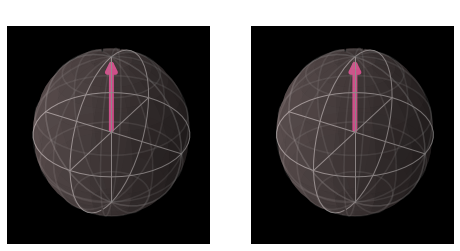

In [3]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

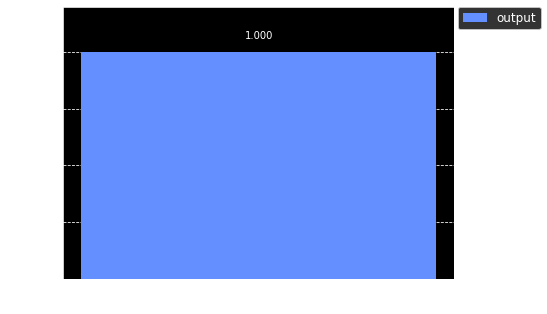

In [5]:
plot_histogram([counts], legend=['output'])

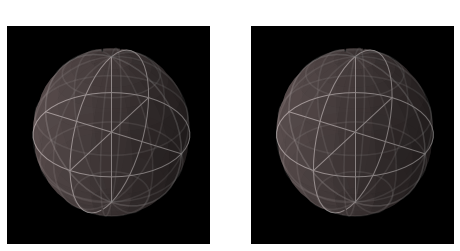

In [8]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

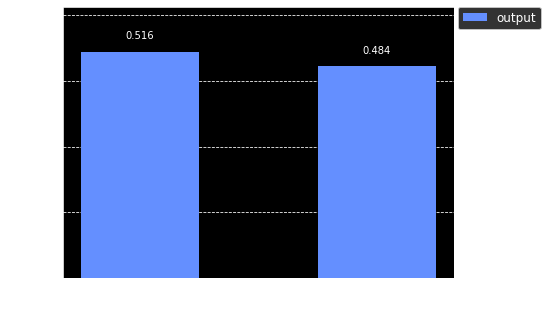

In [9]:
plot_histogram([counts], legend=['output'])

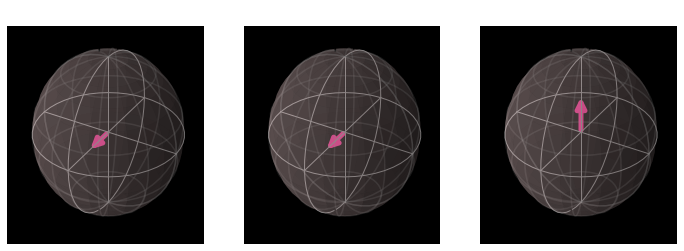

In [11]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec) 

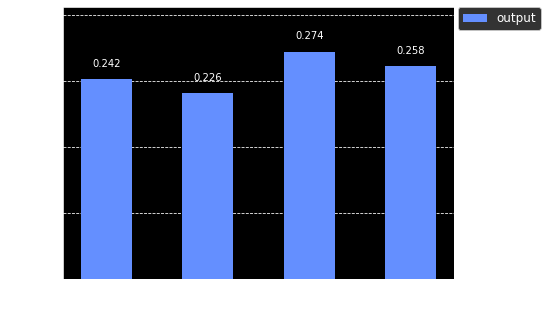

In [12]:
plot_histogram([counts], legend=['output'])

In [13]:
circuit = q.QuantumCircuit(3,1)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()

circuit.measure([2], [0])
circuit.draw()

┌───┐        
q_0: |0>┤ H ├──■─────
        ├───┤  │     
q_1: |0>┤ H ├──■─────
        └───┘┌─┴─┐┌─┐
q_2: |0>─────┤ X ├┤M├
             └───┘└╥┘
 c_0: 0 ═══════════╩═

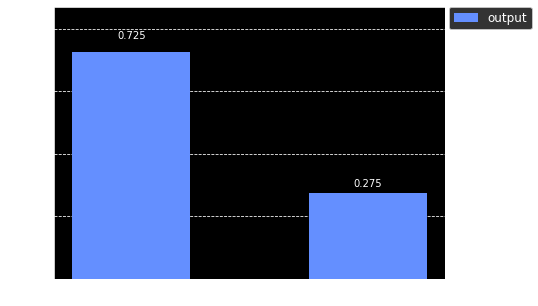

In [14]:
qasm_job = q.execute(circuit, backend = qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])

Rotation

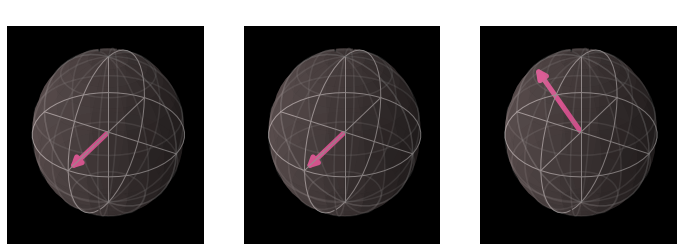

In [20]:
import math

circuit = q.QuantumCircuit(3,3)
circuit.h(0) #hadamard
circuit.h(1) #hadamard
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec) 

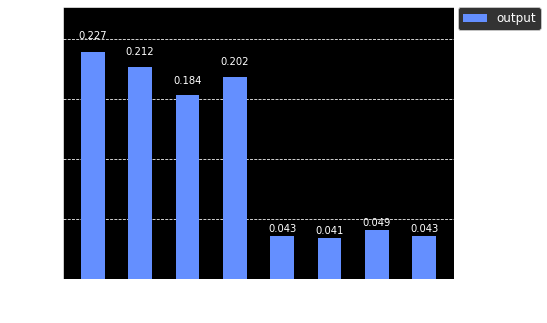

In [21]:
plot_histogram([counts], legend=['output'])

In [24]:
circuit = q.QuantumCircuit(3,1)
circuit.h(0) #hadamard
circuit.h(1) #hadamard
circuit.rx(math.pi/4, 2)
circuit.measure([2], [0])
circuit.draw()

┌───┐       
q_0: |0>───┤ H ├───────
           ├───┤       
q_1: |0>───┤ H ├───────
        ┌──┴───┴───┐┌─┐
q_2: |0>┤ Rx(pi/4) ├┤M├
        └──────────┘└╥┘
 c_0: 0 ═════════════╩═

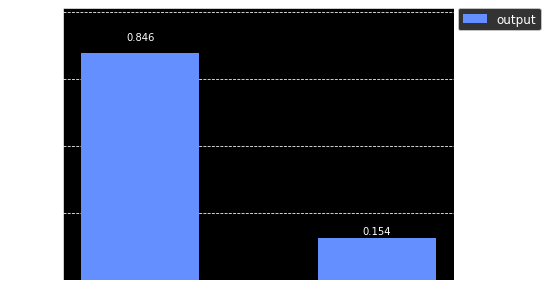

In [26]:
qasm_job = q.execute(circuit, backend = qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])